In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from neural_damped_oscillator import ODE_NN

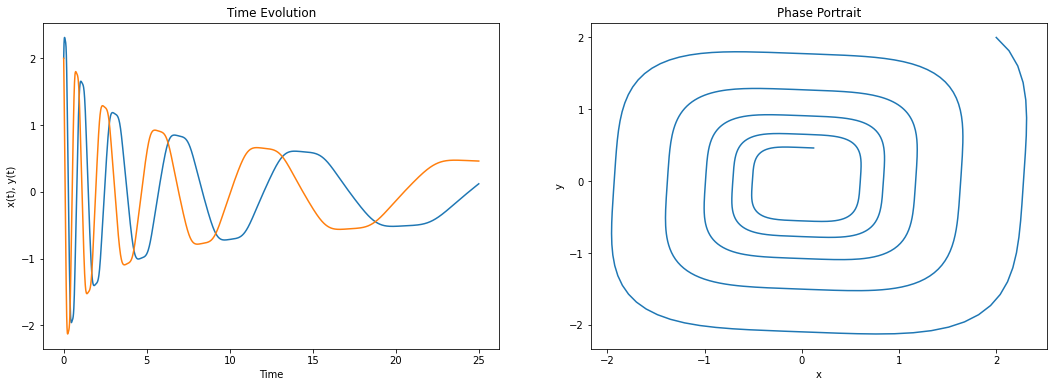

In [6]:
# set up the differential equation and get a reference solution (which is also the training data)

x0y0 = [2,2]
t = np.arange(0, 25, 0.01)

def f(y, t):
    return [-0.1*y[0]**3 + 2.0*y[1]**3, -2.0*y[0]**3 - 0.1*y[1]**3]

system = odeint(f, x0y0, t)

# plot the trajectories and the phase portraits

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t), y(t)')
axs[0].set_title('Time Evolution')
axs[1].plot(system[:,0], system[:,1])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Phase Portrait')
plt.show()

In [7]:
model = ODE_NN(0.01, system, 2, 'AM')

Sequential(
  (0): Linear(in_features=2, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=2, bias=True)
)


Epoch : 0, Loss : 6.5599822998046875
Epoch : 200, Loss : 3.0881459712982178
Epoch : 400, Loss : 2.3768486976623535
Epoch : 600, Loss : 1.0282564163208008
Epoch : 800, Loss : 0.37009868025779724
Epoch : 1000, Loss : 0.22843141853809357
Epoch : 1200, Loss : 0.1293763816356659
Epoch : 1400, Loss : 0.06791972368955612
Epoch : 1600, Loss : 0.03464312106370926
Epoch : 1800, Loss : 0.01902776211500168
Epoch : 2000, Loss : 0.01201937161386013
Epoch : 2200, Loss : 0.008382691070437431
Epoch : 2400, Loss : 0.006049268413335085
Epoch : 2600, Loss : 0.004394536837935448
Epoch : 2800, Loss : 0.003201809013262391
Epoch : 3000, Loss : 0.0023768111132085323
Epoch : 3200, Loss : 0.0017355423187837005
Epoch : 3400, Loss : 0.0013035801239311695
Epoch : 3600, Loss : 0.0009995917789638042
Epoch : 3800, Loss : 0.000790411897469312


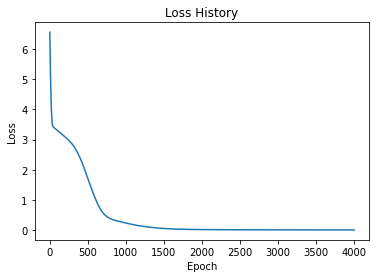

In [8]:
# Train the NN model using the data from the ODE solver and use it as the surrogate for the ODE

num_epochs = 4000
model.train(num_epochs)

def f_NN(y, t):
    f = model.model(torch.Tensor(y)).detach().numpy()
    return f

system_NN = odeint(f_NN, x0y0, t)

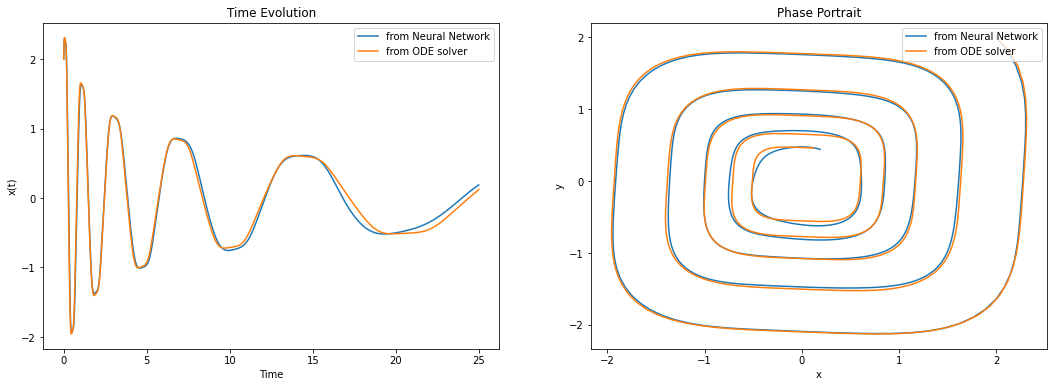

In [5]:
# plot the trajectories and the phase portraits

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()

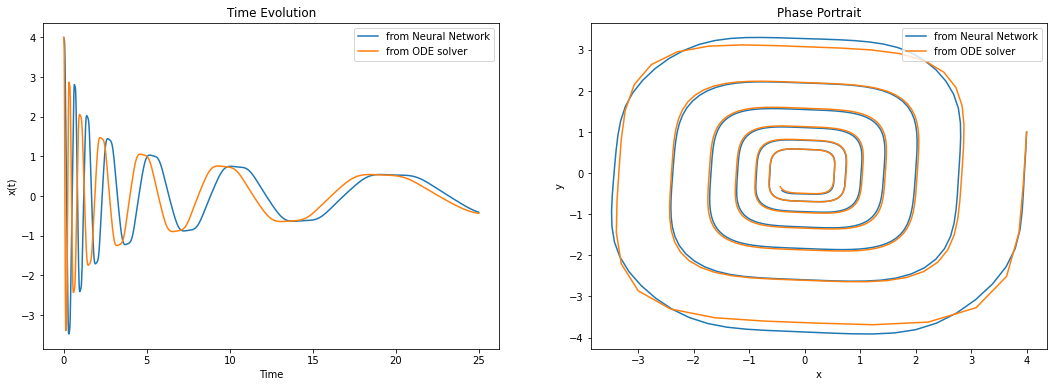

In [9]:
# Checking from another set of initial conditions: (x,y) = (4,1)

x0y0 = [4,1]
system = odeint(f, x0y0, t)
system_NN = odeint(f_NN, x0y0, t)

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()